# $\color{red}{\text{TP1 : Détection des points d'intérêt}}$

**Réalisé par :**
 - BENSLIMANE Zahra

Chargé de cours et TP : Thomas DEITENBECK

**Résumé :** Dans ce TP, nous proposons d’implementer et d’étudier le fonctionnement (influence des parametres, limitations, variantes) d’un detecteur et d’un descripteur dans l’optique de réaliser une application de panorama. 

### EXERCICE 1: DETECTION DE POINTS D´INTERET

L’objectif de cet exercice est d’implementer et d’"tudier deux algorithmes de déetection de points d’intéréet. 

#### 1. Detecteur de Harris : 
(a) Implementer le détecteur de Harris en utilisant une fenétre de ponderation rectangulaire puis gaussienne. 

(b) Implementer également une suppression des non-maxima locaux afin d’éviter les ”amas” de points d’intéréet. 

(c) Etudier l’influence du type de fenétre de ponderation, de sa taille ainsi que du paramétre  k dans la detection de point d’interéet. 

(d) Utiliser les fonctions existantes de Matlab ou Python pour effectuer une rotation de l’image. Les points d’interét detectés sur cette image tournee sont-ils les memes que ceux de l’image originale ? Quel parametre faut-il adapter pour que cela soit le cas ?

In [1]:
# Importing the libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
from datetime import datetime
from scipy.ndimage.filters import maximum_filter
import imutils

from interestPoints_detector import harrisFeatureDetector, pts2kps, loadImage, rotation_Experiment, FASTFeatureDetector
from featureMatching import featuresMatcher

Le nombre depoints détéctés sans NMS : 2464
Le nombre depoints détéctés avec NMS : 169


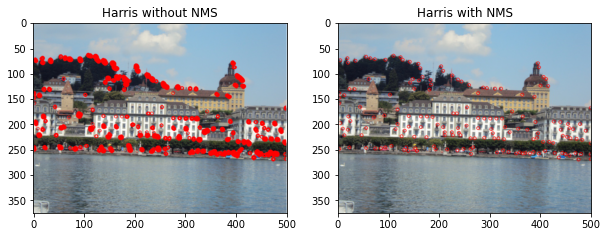

In [2]:
# Loading an image
imageDIR = "P1.jpg"
original_Image  = loadImage(imageDIR, imageType = 'rgb' , imageScale = 'zero_TO_255')
grayScale_Image = loadImage(imageDIR, imageType = 'gray', imageScale = 'zero_TO_one')        

# Set the parameters
size = 5
k = 0.05
decisionThreshold = 0.1

# Create a harris feature detector
kernel  = np.ones((size,size))
harris = harrisFeatureDetector( kernel, k, decisionThreshold)  

pts = harris.detect(grayScale_Image)
I_harris_kpt = cv.drawKeypoints(original_Image, pts2kps(pts) , None, color=(255,0,0))

# Set NMS to true
harris.set_nonMaximalSuppression(True)
harris.set_NMS_maskSize (NMS_maskSize = 7)
ptsNMS = harris.detect(grayScale_Image)
I_harris_kpt_nms = cv.drawKeypoints(original_Image,pts2kps(ptsNMS) , None, color=(255,0,0))

plt.figure(figsize =(10,4))
# Plot the detected corners without NMS
plt.subplot(1,2,1)
plt.imshow(I_harris_kpt)
plt.title("Harris without NMS")
# Plot the detected corners with NMS
plt.subplot(1,2,2);
plt.imshow(I_harris_kpt_nms)
plt.title("Harris with NMS")

print("Le nombre depoints détéctés sans NMS : {}".format(pts.shape[0]))
print("Le nombre depoints détéctés avec NMS : {}".format(ptsNMS.shape[0]))


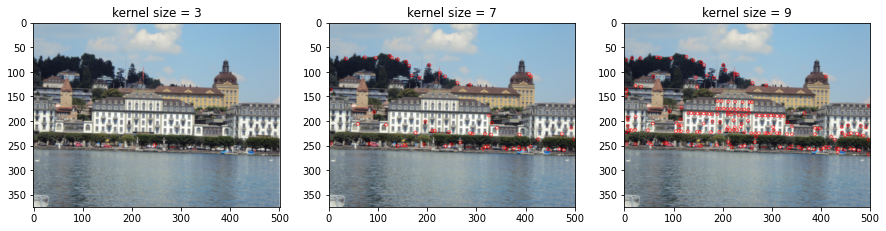

In [3]:
plt.figure(figsize =(15,10))
for i,size in enumerate([3,7,9]):  
    kernel  = np.ones((size,size))
    harris = harrisFeatureDetector(kernel,k = 0.05, decisionThreshold = 0.3, nonMaximalSuppression = True, NMS_maskSize = 7 ) 
    pts = harris.detect(grayScale_Image)
    Ikpt = cv.drawKeypoints(original_Image, pts2kps(pts), None, color=(255,0,0))
    plt.subplot(1,3,i+1); plt.imshow(Ikpt); plt.title("kernel size = {}".format(size))


La taille du kernel joue directement sur le nombre de points d'interet trouvés  

Text(0.5, 1.0, 'Harris with gaussian kernel')

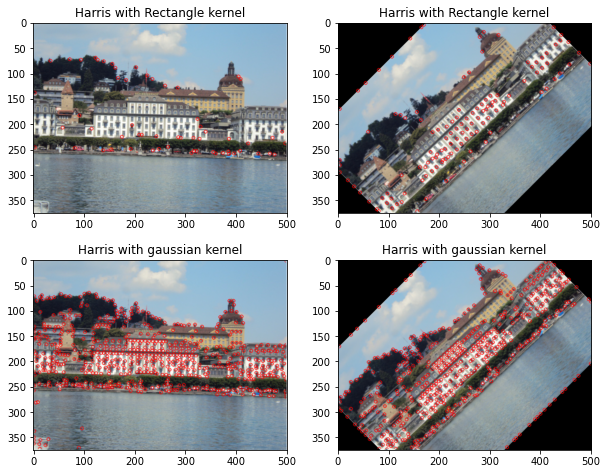

In [4]:
# Loading an image
imageDIR = "P1.jpg"
original_Image  = loadImage(imageDIR, imageType = 'rgb' , imageScale = 'zero_TO_255')
grayScale_Image = loadImage(imageDIR, imageType = 'gray', imageScale = 'zero_TO_one') 

# Rectangular kernel
rect_Kernel = np.ones((7,7))

# Gaussian kernel
gaussian_Kernel = np.array((
    [2, 4,  5,  4,  2],
    [4, 9,  12, 9,  4],
    [5, 12, 15, 12, 5],
    [4, 9,  12, 9,  4],
    [2, 4,  5,  4,  2]), dtype="float64")
 
I_rect_kpt, I_rectRotated_kpt        = rotation_Experiment(original_Image, grayScale_Image, rect_Kernel)
I_gaussian_kpt,I_gaussianRotated_kpt = rotation_Experiment(original_Image, grayScale_Image, gaussian_Kernel)
   
# Plot the results
plt.figure(figsize =(10,8))
plt.subplot(2,2,1); plt.imshow(I_rect_kpt); plt.title("Harris with Rectangle kernel") 
plt.subplot(2,2,2); plt.imshow(I_rectRotated_kpt); plt.title("Harris with Rectangle kernel") 
plt.subplot(2,2,3); plt.imshow(I_gaussian_kpt); plt.title("Harris with gaussian kernel") 
plt.subplot(2,2,4); plt.imshow(I_gaussianRotated_kpt); plt.title("Harris with gaussian kernel") 

Nous remarquons que le détécteur de harris avec une fenetre de pondération rectangulaire ets moins robuste aux rotations qu'un détécteur de harris avec une pondération gaussienne.

### 2. Detecteur FAST : 
(a) Implementer le détecteur FAST.  

(b) Implementer la suppression des non-maxima locaux. Quelle score utilise pour cette suppression ? 

(c) Utiliser les fonctions existantes de Matlab ou Python pour effectuer une rotation de l’image. Les points d’interét detectés sur cette image tournee sont-ils les memes que ceux de l’image originale ? Quel parametre faut-il adapter pour que cela soit le cas ?


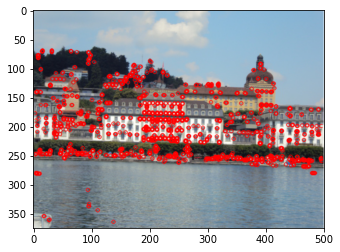

In [5]:
# Loading an image
imageDIR = "P1.jpg"
original_Image  = loadImage(imageDIR, imageType = 'rgb' , imageScale = 'zero_TO_255')
grayScale_Image = loadImage(imageDIR, imageType = 'gray', imageScale = 'zero_TO_255') 

Fast = FASTFeatureDetector(windowSize = 12)
pts  = Fast.detect(grayScale_Image)

I_Fast_kpt = cv.drawKeypoints(original_Image, pts2kps(pts) , None, color=(255,0,0))
plt.figure(figsize =(10,4))
plt.imshow(I_Fast_kpt)

### FAST OPEN CV

Threshold: 50
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 774
Total Keypoints without nonmaxSuppression: 2527


Text(0.5, 1.0, 'Keypoints with nonmaxSuppression')

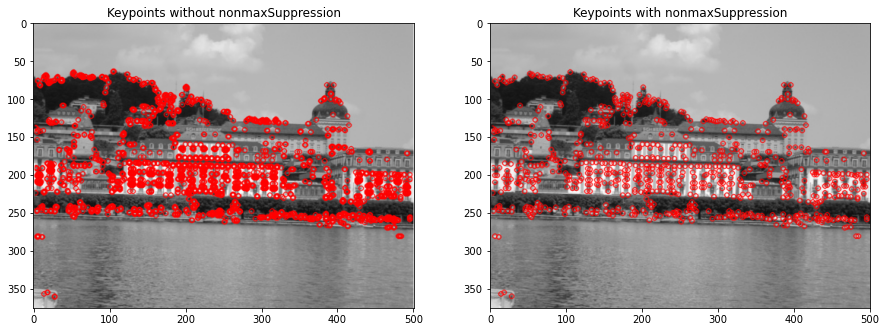

In [6]:
img = cv.imread("P1.jpg",0) # `<opencv_root>/samples/data/blox.jpg`
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
fast.setThreshold(50)
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()))
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv.imwrite('fast_true.png', img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
fast.setThreshold(50)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cv.imwrite('fast_false.png', img3)


plt.figure(figsize =(15,15))
plt.subplot(1,2,1); plt.imshow(img3); plt.title("Keypoints without nonmaxSuppression")
plt.subplot(1,2,2); plt.imshow(img2); plt.title("Keypoints with nonmaxSuppression")

### EXERCICE 2: DESCRIPTION ET MATCHINGS DES POINTS D’INTERET
L’objectif de cet exercice est d’implementer et d’étudier une méthode de description et de matching des points d’intérét d etectés dans l’exercice precédent. 

#### 1. Description simple : Utilisation d’un bloc d’intensité
(a) Pour chaque point d’interét, recupérer un bloc de pixels autour de celui-ci et transformer le en vecteur. 

(b) Implementer une méthode de matching capable de gérer les mauvais matchs (soit via un appariement croisée, soit par 
comparaison des distances)

Text(0.5, 1.0, 'Image 2 : points of interest = 205')

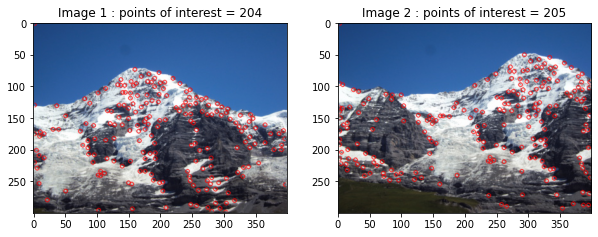

In [11]:
# Loading image
imageDIR = "M3.jpg"
original_I1  = loadImage(imageDIR, imageType = 'rgb' , imageScale = 'zero_TO_255')
grayScale_I1 = loadImage(imageDIR, imageType = 'gray', imageScale = 'zero_TO_one') 

# Loading  image 2
imageDIR = "M2.jpg"
original_I2  = loadImage(imageDIR, imageType = 'rgb' , imageScale = 'zero_TO_255')
grayScale_I2 = loadImage(imageDIR, imageType = 'gray', imageScale = 'zero_TO_one')   

kernel  = np.ones((5,5))
harris = harrisFeatureDetector( kernel, k = 0.05,  decisionThreshold = 0.1, nonMaximalSuppression = True, NMS_maskSize = 7)  

pts1 = harris.detect(grayScale_I1)
pts2 = harris.detect(grayScale_I2)

harris_kpt_I1 = cv.drawKeypoints(original_I1, pts2kps(pts1) , None, color=(255,0,0))
harris_kpt_I2 = cv.drawKeypoints(original_I2, pts2kps(pts2) , None, color=(255,0,0))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(10, 5))
ax1.imshow(harris_kpt_I1); ax1.set_title("Image 1 : points of interest = {}".format(pts1.shape[0]))
ax2.imshow(harris_kpt_I2); ax2.set_title("Image 2 : points of interest = {}".format(pts2.shape[0]))

**La mise en correspendances des points d'interets de l'image 1 et l'image 2**: La méthode de mise en correspondance est basée sur des mesures de corrélation entre les pixels et leurs voisinages. Elle permet de quantifier la ressemblance entre deux points d'interets descripteurs 

La méthode d'appariement croisé est implémenter.

$ distance = \sum_{p = -1}^{1}  \sum_{q = -1}^{1} ( I_{i+p,j+q}^{ga} , I_{m+p,n+q}^{d} )^{2}   $

**Appariement croisé (vérification bidirectionnelle)** : Il faut que les correspendances soit symétriques. 

Exemple : En haut : paire valide , En bas : paire rejetée 

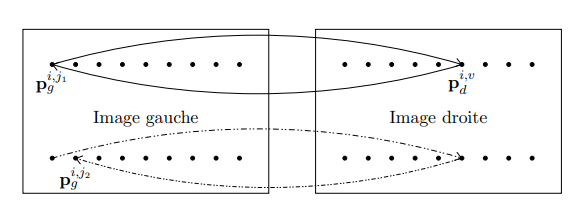


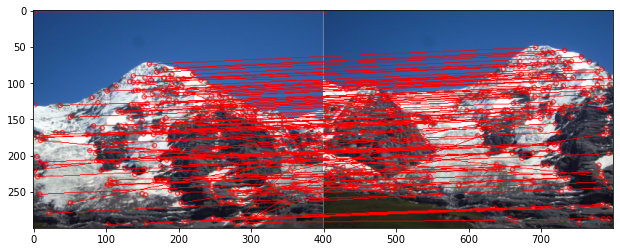

In [12]:
xyA,xyB = featuresMatcher(grayScale_I1, pts1, grayScale_I2, pts2, 
                          descriptorSize = 5, 
                          distanceType = "Sum_of_Squared_Distances",
                          TranslationOnly =  False)
plt.figure(figsize =(15,4))
img3 = np.concatenate((harris_kpt_I1,harris_kpt_I2), axis=1)
for pointA, pointB in zip(xyA,xyB):
    xA, yA = np.array(pointA).ravel()
    xB, yB = np.array(pointB).ravel()
    #color = np.random.randint(0, 255, size = (3, ))
    #color = (int(color[0]), int(color[1]), int(color[2]))
    color = (255,0,0)
    img3 = cv.line(img3, (yA,xA) , (yB+400 , xB), color = color , thickness =1)     
plt.imshow(img3)

Dans l'appariement précédent, le problème plus important est celui des appariements erronés.

Une autre méthode est basée le calcul des distances relatives, en introduisant un seuil, qui détermine si les deux descripteurs sont assez proche ou pas. 

$\Delta( I_{i,j}^{gauche} , I_{m,n}^{droite} )  = \frac{| I_{i,j}^{g} - I_{m,n}^{d} |}{I_{i,j}^{gauche} + I_{m,n}^{droite}}  \le Seuil $

exemple : Taille fenetre descripteur = 3

$\sum_{p = -1}^{1}  \sum_{q = -1}^{1}  \Delta( I_{i+p,j+q}^{ga} , I_{m+p,n+q}^{d} )^{2}  \le \sum_{p = -1}^{1}  \sum_{q = -1}^{1} seuil^{2}  = 9*S^{2} $

Les paires de pixels ne vérifiant pas cette égalité sont rejetées
car trop suspectes.

Une contrainte de plus est ajoutée dans cet exemple :

**contrainte épipolaire avce une marge d'erreur** : On considère que les deux images ne sont liés que par une translation. C'est à dire, pour un pixel de l’image droite situé sur la ligne l, on ne concidère de valid que les correspendants qui sont dans une ligne + ou - l 


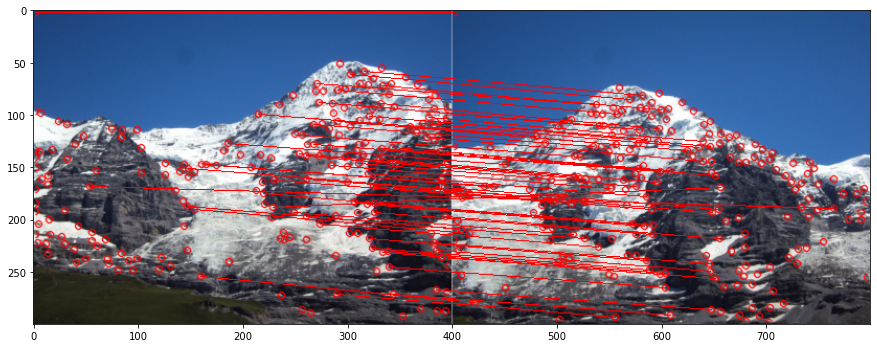

In [17]:
xyA,xyB = featuresMatcher(grayScale_I1, pts1, grayScale_I2, pts2, 
                          descriptorSize = 11, 
                          distanceType = "Sum_Of_Relative_Distances",
                          TranslationOnly =  True)

img3 = np.concatenate((harris_kpt_I1,harris_kpt_I2), axis=1)
for pointA, pointB in zip(xyA,xyB):
    xA, yA = np.array(pointA).ravel()
    xB, yB = np.array(pointB).ravel()
    #color = np.random.randint(0, 255, size = (3, ))
    #color = (int(color[0]), int(color[1]), int(color[2]))
    color = (255,0,0)
    img3 = cv.line(img3, (yA,xA) , (yB+400 , xB), color = color , thickness =1)     

plt.figure(figsize =(15,8))    
plt.imshow(img3)

Nous remarquons avec la contrainte épipolaire nous avons beaucoup moins d'appariement érronés